In [7]:
from model import ModelHandler
from DataLoader import DiagnosisEnd2End
import numpy as np
import tqdm
import torch
from Unet2 import UNET

model = UNET(1, 1)
model.load_state_dict(torch.load("unet_segment.pth"))

<All keys matched successfully>

## End2End Data

In [8]:
path_segmentation = "../data/Diagnosis/"
nodules_path = "../data/Diagnosis/Radiolung_NoduleDiagnosis.csv"

In [9]:
diagonis = DiagnosisEnd2End(path_segmentation, nodules_path)

X_data_curated = np.zeros((47, 14, 64, 64))
y_data_curated = np.zeros(47)
i = 0

for data in tqdm.tqdm(diagonis):
    m = data['ROI'].shape[0]//2   
    X_data_curated[i] = model(torch.from_numpy(data["ROI"][m-7:m+7, :, :]).reshape((14, 1, 64, 64)).float()).detach().numpy().reshape((14, 64, 64))
    y_data_curated[i] = data['GT']
    i+=1


 81%|████████  | 42/52 [02:04<00:29,  2.96s/it]


## SVM

In [10]:
svm = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'SVM', n_splits = 5)
svm.fit(True,True)

[INFO] The best parameters are {'C': 0.01, 'kernel': 'poly'}
[INFO] The best score is 0.8000
[INFO] The best parameters according to ci are {'C': 10000000.0, 'kernel': 'poly'}
[INFO] Train acc  is : 1.0000


In [11]:
svm.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,C,kernel,mean,sem,ci,sort
13,"{'C': 10000000.0, 'kernel': 'poly'}",0.8,0.8,0.9,0.8,0.7,1.000000e+07,poly,0.8,0.031623,"(0.7122010689270405, 0.8877989310729596)",0.356101
5,"{'C': 10.0, 'kernel': 'poly'}",0.8,0.8,0.9,0.8,0.7,1.000000e+01,poly,0.8,0.031623,"(0.7122010689270405, 0.8877989310729596)",0.356101
17,"{'C': 10000000000.0, 'kernel': 'poly'}",0.8,0.8,0.9,0.8,0.7,1.000000e+10,poly,0.8,0.031623,"(0.7122010689270405, 0.8877989310729596)",0.356101
9,"{'C': 10000.0, 'kernel': 'poly'}",0.8,0.8,0.9,0.8,0.7,1.000000e+04,poly,0.8,0.031623,"(0.7122010689270405, 0.8877989310729596)",0.356101
1,"{'C': 0.01, 'kernel': 'poly'}",0.8,0.8,0.9,0.8,0.7,1.000000e-02,poly,0.8,0.031623,"(0.7122010689270405, 0.8877989310729596)",0.356101


findfont: Font family ['Gill Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Gill Sans'] not found. Falling back to DejaVu Sans.


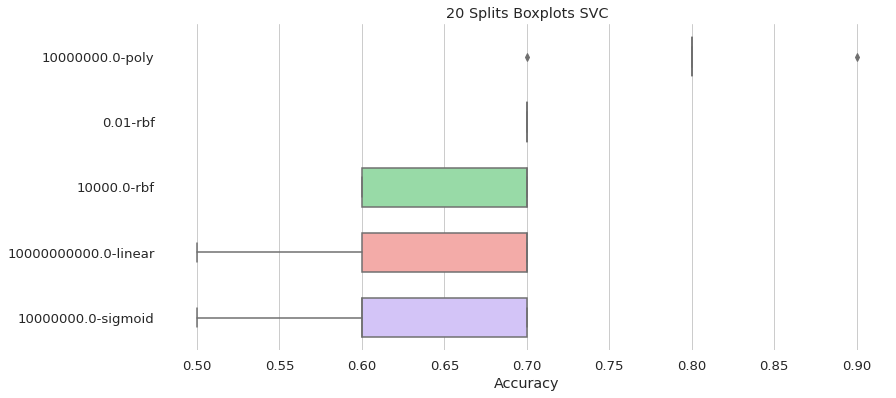

In [12]:
svm.boxplots(20)

## KNN

In [13]:
knn = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'KNN', n_splits = 5)
knn.fit(True,True)

[INFO] The best parameters are {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
[INFO] The best score is 0.8000
[INFO] The best parameters according to ci are {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
[INFO] Train acc  is : 0.8298


In [14]:
knn.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,algorithm,n_neighbors,p,mean,sem,ci,sort
2,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}",0.8,0.8,0.9,0.8,0.7,auto,5,1,0.8,3.162279e-02,"(0.7122010689270405, 0.8877989310729596)",0.356101
26,"{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1}",0.8,0.8,0.9,0.8,0.7,brute,5,1,0.8,3.162279e-02,"(0.7122010689270405, 0.8877989310729596)",0.356101
10,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",0.8,0.8,0.9,0.8,0.7,ball_tree,5,1,0.8,3.162279e-02,"(0.7122010689270405, 0.8877989310729596)",0.356101
18,"{'algorithm': 'kd_tree', 'n_neighbors': 5, 'p'...",0.8,0.8,0.9,0.8,0.7,kd_tree,5,1,0.8,3.162279e-02,"(0.7122010689270405, 0.8877989310729596)",0.356101
31,"{'algorithm': 'brute', 'n_neighbors': 9, 'p': 2}",0.7,0.7,0.7,0.7,0.7,brute,9,2,0.7,1.000000e-08,"(0.6999999722355489, 0.700000027764451)",0.350000


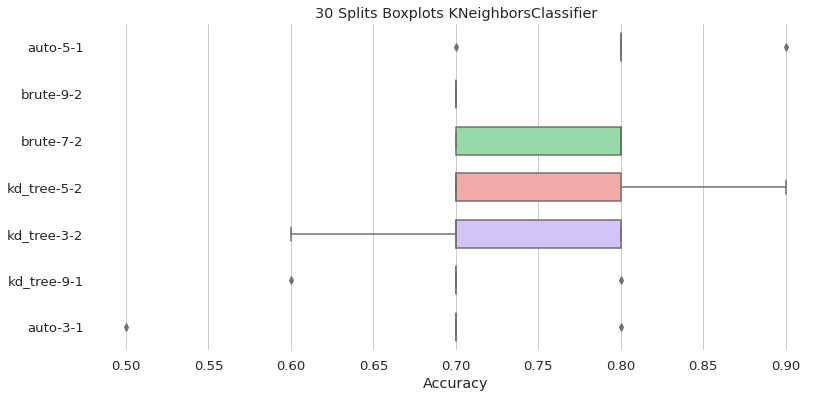

In [15]:
knn.boxplots(30)

## Decision Tree

In [16]:
dt = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'DT', n_splits = 5)
dt.fit(True,True)

[INFO] The best parameters are {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}
[INFO] The best score is 0.7800
[INFO] The best parameters according to ci are {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}
[INFO] Train acc  is : 1.0000


In [17]:
dt.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,criterion,max_features,splitter,mean,sem,ci,sort
3,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.8,0.9,0.7,0.8,0.7,gini,sqrt,random,0.78,0.037417,"(0.6761149088671919, 0.8838850911328081)",0.338057
5,"{'criterion': 'gini', 'max_features': 'log2', ...",0.8,0.7,0.7,0.8,0.7,gini,log2,random,0.74,0.024495,"(0.6719912341697232, 0.8080087658302768)",0.335996
10,"{'criterion': 'entropy', 'max_features': 'log2...",0.7,0.9,0.6,1.0,0.7,entropy,log2,best,0.78,0.073485,"(0.5759737580380718, 0.9840262419619282)",0.287987
2,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.8,0.5,0.8,0.7,0.7,gini,sqrt,best,0.70,0.054772,"(0.5479278108563851, 0.8520721891436148)",0.273964
1,"{'criterion': 'gini', 'max_features': 'auto', ...",0.6,0.5,0.6,0.6,0.6,gini,auto,random,0.58,0.020000,"(0.5244710701315931, 0.635528929868407)",0.262236


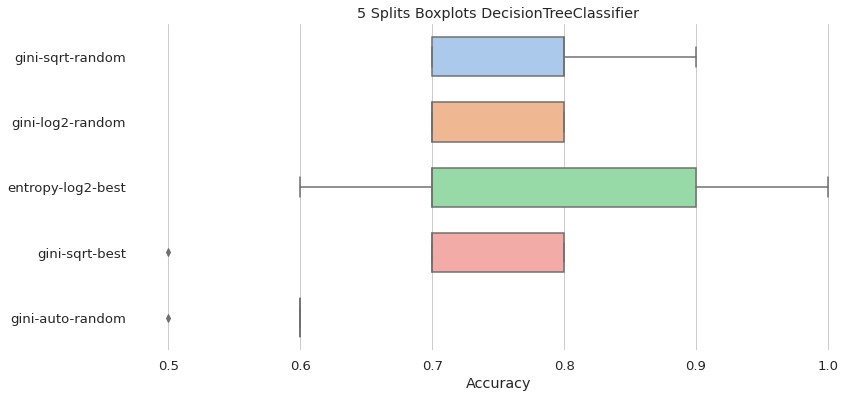

In [18]:
dt.boxplots(5)

In [19]:
from results_analysis import results_analysis

In [20]:
results_analysis(y_data_curated, dt.predict(X_data_curated))


(   accuracy  f1score  precision  recall
 0       1.0      1.0        1.0     1.0,
    tn  fp  fn  tp
 0  13   0   0  34)

In [21]:
results_analysis(y_data_curated, knn.predict(X_data_curated))


(   accuracy   f1score  precision  recall
 0  0.829787  0.894737   0.809524     1.0,
    tn  fp  fn  tp
 0   5   8   0  34)

In [22]:
results_analysis(y_data_curated, svm.predict(X_data_curated))


(   accuracy  f1score  precision  recall
 0       1.0      1.0        1.0     1.0,
    tn  fp  fn  tp
 0  13   0   0  34)